# Action Recognition EDA
This script is run post raw data collection and processesing. 

#### Previous Raw Data Collection & Processing Summary
The raw data collection process consisted of manually generating 210 raw video clips for 6 different actions (wave, kiss, middle finger, heart, salute, and idle), with each video clip being 40 frames long. Once video clips were generated, each video frame was processed using Google's mediapipe holistic model to identify and extract key landmarks on the human body. 

Each landmark contains a corresponding x, y, & z value, with a visibility value included for the general pose landmarks, and there are 543 landmarks collected for each frame. It is these landmarks which will be used as data points when training our machine learning models. Taking into account each x, y, z, & visibility (pose only) values for each landmark, there are 1662 data points generated for each frame. 

- Number of Pose landmarks = 33 (each with an x, y, z & visibility value) = 132 data points
- Number of Face Landmarks = 468 (each with an x, y, z value) = 1404 data points
- Left Hand Landmarks = 21 (each with an x, y, z value) = 63 data points
- Right Hand Landmarks = 21 (each with an x, y, z value) = 63 data points

The landmark data for each video frame is then flattened, concatenated, and saved as a numpy array. The reasons why the Mediapipe generated landmarks are used over the raw video images are:

1. Using the location of a person's body part within the camera frame substantially reduces the amount of data needed to train the model(s). If we passed through all of the pixel data in a frame to the model, it would result in 554x more data. This drastically increases model complexity, CPU usage, and runtime. The default resolution on a web camera is 640.0 by 480.0 pixels - that's a total of 307,200 pixels. With each pixel having 3 color channels, each channel representing the amount of green, blue, and red in each pixel, the total data generated per frame would be 921,600 data points - substantially more than our 1662 landmark values. 

2. Training an object recognition model is a difficult task in and of itself, and Mediapipe's holistic model provides a stable object detection algorithm which works in a variety of different environments. By utilizing Mediapipe's holistic model, we do not need to be concerned with external factors, such as background and lighting, which would otherwise impact our model's performance.  

3. By only passing through body location data, there is no other external noise in our data being passed through to our model. This provides cleaner data for our model to detect actions and gestures. 

The goal of this notebook is to convert all of the individual numpy arrays, containing the 1662 landmark data points for each frame, into a pandas dataframe for further downstream analysis and feature engineering.

In [78]:
import numpy as np
import pandas as pd
import os
import mediapipe as mp
from keypoints import Pipe
import cv2
from matplotlib import pyplot as plt
import seaborn as sns

## Load Video Frames and Create 2D Matrices for EDA

First thing is to load all the data in. We do this by looping through each action folder, and loading in the extracted landmark values from each frame in every video.

The data is stored in the below format, and the next cell of code loops through every folder, collecting the individual frame data and records its corresponding classification tag.

* Processed_Data >
    * wave_data >
        * subject1_waving_videos >
            * Subject1_wave_video_sample_1 > 
                * frame0.npy
                * frame1.npy
                    * 
                    * 
                * frame39.npy
        * subject2_waving_videos >
            * 
            * 
    * heart >
     * 
     * 
    * n_action
    

In [4]:
# set path to saved data
data_path = "./Processed_Data"

# get list of all detected actions
action_list = os.listdir(data_path)

# create a mapping dict to detected action
label_map = {label: num for num, label in enumerate(action_list)}


# Instantiate Mediapipe model
model = Pipe()

# number of frames per video
frames_per_vid = model.frames_per_seq # Pipe module is not importing properly

# set up video and label lists
videos, labels = [], []

# loop through each action folder to get all video data
for action in action_list:
    
    # loop through every data file for each person who provided data
    # get the list of the folder paths for everyone who provided data  
    diff_data_subjects = os.listdir(os.path.join(data_path, action))
    
    # loop through each person's folder
    for data_subject in diff_data_subjects:
        
        # loop through each of the 30 video samples taken per action
        for vid_number in range(0, model.num_sample_videos): 
            print(action, data_subject, vid_number)
            
            # window which will store data for all 40 frames in a video. Full window will then be appended to 
            # to the videos list. each window will be 40 x 1662 in shape
            window = []
            
            # loop through each frame per video sample
            for frame_num in range(0, frames_per_vid):
                
                # set the path to each video frame
                path = os.path.join(data_path, action, data_subject, str(vid_number),
                                    data_subject+'{}.npy'.format(str(frame_num)))
                # load the numpy array to specific video frame and append to window list
                window.append(np.load(path))
                
            # after each video sample append the window list to the videos list
            videos.append(window)
            
            # append corresponding label to the labels list
            labels.append(label_map[action])

finger Dev_sitting_Data 0
finger Dev_sitting_Data 1
finger Dev_sitting_Data 2
finger Dev_sitting_Data 3
finger Dev_sitting_Data 4
finger Dev_sitting_Data 5
finger Dev_sitting_Data 6
finger Dev_sitting_Data 7
finger Dev_sitting_Data 8
finger Dev_sitting_Data 9
finger Dev_sitting_Data 10
finger Dev_sitting_Data 11
finger Dev_sitting_Data 12
finger Dev_sitting_Data 13
finger Dev_sitting_Data 14
finger Dev_sitting_Data 15
finger Dev_sitting_Data 16
finger Dev_sitting_Data 17
finger Dev_sitting_Data 18
finger Dev_sitting_Data 19
finger Dev_sitting_Data 20
finger Dev_sitting_Data 21
finger Dev_sitting_Data 22
finger Dev_sitting_Data 23
finger Dev_sitting_Data 24
finger Dev_sitting_Data 25
finger Dev_sitting_Data 26
finger Dev_sitting_Data 27
finger Dev_sitting_Data 28
finger Dev_sitting_Data 29
finger Kieran_table_Data 0
finger Kieran_table_Data 1
finger Kieran_table_Data 2
finger Kieran_table_Data 3
finger Kieran_table_Data 4
finger Kieran_table_Data 5
finger Kieran_table_Data 6
finger Kier

heart Liam_Kitchen_Data 1
heart Liam_Kitchen_Data 2
heart Liam_Kitchen_Data 3
heart Liam_Kitchen_Data 4
heart Liam_Kitchen_Data 5
heart Liam_Kitchen_Data 6
heart Liam_Kitchen_Data 7
heart Liam_Kitchen_Data 8
heart Liam_Kitchen_Data 9
heart Liam_Kitchen_Data 10
heart Liam_Kitchen_Data 11
heart Liam_Kitchen_Data 12
heart Liam_Kitchen_Data 13
heart Liam_Kitchen_Data 14
heart Liam_Kitchen_Data 15
heart Liam_Kitchen_Data 16
heart Liam_Kitchen_Data 17
heart Liam_Kitchen_Data 18
heart Liam_Kitchen_Data 19
heart Liam_Kitchen_Data 20
heart Liam_Kitchen_Data 21
heart Liam_Kitchen_Data 22
heart Liam_Kitchen_Data 23
heart Liam_Kitchen_Data 24
heart Liam_Kitchen_Data 25
heart Liam_Kitchen_Data 26
heart Liam_Kitchen_Data 27
heart Liam_Kitchen_Data 28
heart Liam_Kitchen_Data 29
heart Liam_Sitting_Data 0
heart Liam_Sitting_Data 1
heart Liam_Sitting_Data 2
heart Liam_Sitting_Data 3
heart Liam_Sitting_Data 4
heart Liam_Sitting_Data 5
heart Liam_Sitting_Data 6
heart Liam_Sitting_Data 7
heart Liam_Sitting

idle William_desk_Data 27
idle William_desk_Data 28
idle William_desk_Data 29
kiss Dev_sitting_Data 0
kiss Dev_sitting_Data 1
kiss Dev_sitting_Data 2
kiss Dev_sitting_Data 3
kiss Dev_sitting_Data 4
kiss Dev_sitting_Data 5
kiss Dev_sitting_Data 6
kiss Dev_sitting_Data 7
kiss Dev_sitting_Data 8
kiss Dev_sitting_Data 9
kiss Dev_sitting_Data 10
kiss Dev_sitting_Data 11
kiss Dev_sitting_Data 12
kiss Dev_sitting_Data 13
kiss Dev_sitting_Data 14
kiss Dev_sitting_Data 15
kiss Dev_sitting_Data 16
kiss Dev_sitting_Data 17
kiss Dev_sitting_Data 18
kiss Dev_sitting_Data 19
kiss Dev_sitting_Data 20
kiss Dev_sitting_Data 21
kiss Dev_sitting_Data 22
kiss Dev_sitting_Data 23
kiss Dev_sitting_Data 24
kiss Dev_sitting_Data 25
kiss Dev_sitting_Data 26
kiss Dev_sitting_Data 27
kiss Dev_sitting_Data 28
kiss Dev_sitting_Data 29
kiss Kieran_table_Data 0
kiss Kieran_table_Data 1
kiss Kieran_table_Data 2
kiss Kieran_table_Data 3
kiss Kieran_table_Data 4
kiss Kieran_table_Data 5
kiss Kieran_table_Data 6
kiss Ki

salute Liam_Kitchen_Data 21
salute Liam_Kitchen_Data 22
salute Liam_Kitchen_Data 23
salute Liam_Kitchen_Data 24
salute Liam_Kitchen_Data 25
salute Liam_Kitchen_Data 26
salute Liam_Kitchen_Data 27
salute Liam_Kitchen_Data 28
salute Liam_Kitchen_Data 29
salute Liam_Sitting_Data 0
salute Liam_Sitting_Data 1
salute Liam_Sitting_Data 2
salute Liam_Sitting_Data 3
salute Liam_Sitting_Data 4
salute Liam_Sitting_Data 5
salute Liam_Sitting_Data 6
salute Liam_Sitting_Data 7
salute Liam_Sitting_Data 8
salute Liam_Sitting_Data 9
salute Liam_Sitting_Data 10
salute Liam_Sitting_Data 11
salute Liam_Sitting_Data 12
salute Liam_Sitting_Data 13
salute Liam_Sitting_Data 14
salute Liam_Sitting_Data 15
salute Liam_Sitting_Data 16
salute Liam_Sitting_Data 17
salute Liam_Sitting_Data 18
salute Liam_Sitting_Data 19
salute Liam_Sitting_Data 20
salute Liam_Sitting_Data 21
salute Liam_Sitting_Data 22
salute Liam_Sitting_Data 23
salute Liam_Sitting_Data 24
salute Liam_Sitting_Data 25
salute Liam_Sitting_Data 26
sa

wave William_desk_Data 29


In [5]:
# convert lists to numpy arrays
videos = np.array(videos)
labels = np.array(labels)

# check to make sure everything is loaded in properly, we are expecting to see 1260 unique video samples, 
# each 40 frames long, and with every frame consisting of 1662 data points.
print(videos.shape)
print(labels.shape)
print(videos[0][0].shape)

(1260, 40, 1662)
(1260,)
(1662,)


Data was properly loaded with 1260 observations (each observation having 40 frames and 1662 landmark co-ordinates per frame). 

The data is currently in the correct format to pass through to a neural network, but in order to further explore the data we are going to reshape the data into a 2D matrix and separate the landmarks back out into their respective body part groupings (i.e. face landmarks, left hand landmarks, right hand landmarks, and pose landmarks).

As mentioned previously, each landmark correlates to a specific point on the human body, and each landmark has a specific position in our 1662 landmark list (i.e. We know that the 3 values in the landmark list always corresponds to the x, y, & z position for the nose landmark). This makes unraveling the landmarks back into their respective groups straightforward. 

The landmark groups were concatenated in the below order:
1. pose (33 landmarks each with an x, y, z, & visibility value - always corresponds to the first 132 values)
2. face (468 landmarks each with an x, y, & z value - always corresponds to the next 1404 values)
3. left hand (21 landmarks each with an x, y, & z value - always corresponds to the following 63 values)
4. right hand (21 landmarks each with an x, y, & z value - always corresponds to the last 63 values)

In [6]:
# Create dictionary to hold landmark data for each body group
pose_values = {}
face_values = {}
lh_values = {}
rh_values = {}

# create video number counter
# There are 210 samples per class and we want each observation label to carry information relating it back to its
# respective action class, video sample number, and frame number 
vid_sample_num = 0

# loop through every video
for video_sample_number in range(videos.shape[0]):
    
    # determine which video sample the current frame belongs to
    if vid_sample_num < int(videos.shape[0]/6):
        vid_sample = vid_sample_num
        
    elif vid_sample_num < int(videos.shape[0]/6)*2:
        vid_sample = vid_sample_num - int(videos.shape[0]/6)
        
    elif vid_sample_num < int(videos.shape[0]/6)*3:
        vid_sample = vid_sample_num - int(videos.shape[0]/6)*2
        
    elif vid_sample_num < int(videos.shape[0]/6)*4:
        vid_sample = vid_sample_num - int(videos.shape[0]/6)*3
    
    elif vid_sample_num < int(videos.shape[0]/6)*5:
        vid_sample = vid_sample_num - int(videos.shape[0]/6)*4
        
    else:
        vid_sample = vid_sample_num - int(videos.shape[0]/6)*5
        
    # loop through each frame in each video sample
    for frame in range(videos.shape[1]):
        # create the row label which contains the current frames action/video_sample_number/frame_num_in_video_sample
        row_name = action_list[labels[vid_sample_num]] +"_" + str(vid_sample) + "_" + str(frame)
        
        # split out landmark data to their respective body regions
        pose_values[row_name] = videos[video_sample_number][frame][0:132]
        face_values[row_name] = videos[video_sample_number][frame][132:1536]
        lh_values[row_name] = videos[video_sample_number][frame][1536:1599]
        rh_values[row_name] = videos[video_sample_number][frame][1599:]
        
    vid_sample_num += 1

In [7]:
# ensure split happened correctly
pose_values

{'finger_0_0': array([ 5.03753543e-01,  5.48919380e-01, -7.53539562e-01,  9.99928415e-01,
         5.15265584e-01,  5.08145988e-01, -6.85853839e-01,  9.99795496e-01,
         5.26490808e-01,  5.08343518e-01, -6.85838223e-01,  9.99785542e-01,
         5.37297428e-01,  5.07956922e-01, -6.85886025e-01,  9.99756753e-01,
         4.80388641e-01,  5.05482972e-01, -7.31253982e-01,  9.99790013e-01,
         4.65064138e-01,  5.04712403e-01, -7.31387019e-01,  9.99787390e-01,
         4.49204683e-01,  5.04193366e-01, -7.31801391e-01,  9.99798357e-01,
         5.35020053e-01,  5.30291617e-01, -3.81446779e-01,  9.99620020e-01,
         4.10546452e-01,  5.26878655e-01, -5.81875682e-01,  9.99906600e-01,
         5.16344547e-01,  5.90068102e-01, -6.42787814e-01,  9.99897778e-01,
         4.77049679e-01,  5.90370297e-01, -7.01228440e-01,  9.99947250e-01,
         5.76335371e-01,  7.75411665e-01, -1.39373124e-01,  9.98877347e-01,
         2.85322607e-01,  7.61919737e-01, -5.72005928e-01,  9.99282181e-01

In [8]:
# Convert dictionaries to dataframes, setting the key value as that rows index
pose_df = pd.DataFrame.from_dict(pose_values, orient='index')
face_df = pd.DataFrame.from_dict(face_values, orient='index')
lh_df = pd.DataFrame.from_dict(lh_values, orient='index')
rh_df = pd.DataFrame.from_dict(rh_values, orient='index')


In [9]:
# reset indexes - keeping label index as a col
pose_df.reset_index(inplace=True)
face_df.reset_index(inplace=True)
lh_df.reset_index(inplace=True)
rh_df.reset_index(inplace=True)

In [10]:
# create action category, video sample number and frame number columns
landmark_list = [pose_df, face_df, lh_df, rh_df]
for landmark_df in landmark_list:
    landmark_df['action'] = landmark_df['index'].apply(lambda x: x.split("_")[0])
    landmark_df['video sample number'] = landmark_df['index'].apply(lambda x: x.split("_")[1]).astype(int)
    landmark_df['frame number'] = landmark_df['index'].apply(lambda x: x.split("_")[2]).astype(int)
    

In [13]:
# sanity check
print(pose_df.info())
lh_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50400 entries, 0 to 50399
Columns: 136 entries, index to frame number
dtypes: float64(132), object(4)
memory usage: 52.3+ MB
None


index    0    1    2    3    4    5    6    7    8  ...   56   57  \
0  finger_0_0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1  finger_0_1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2  finger_0_2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3  finger_0_3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4  finger_0_4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

    58   59   60   61   62  action  video sample number  frame number  
0  0.0  0.0  0.0  0.0  0.0  finger                    0             0  
1  0.0  0.0  0.0  0.0  0.0  finger                    0             1  
2  0.0  0.0  0.0  0.0  0.0  finger                    0             2  
3  0.0  0.0  0.0  0.0  0.0  finger                    0             3  
4  0.0  0.0  0.0  0.0  0.0  finger                    0             4  

[5 rows x 67 columns]

Identification columns were successfully added. We can drop the "index" col with all the aggregated information and start our analysis.

In [14]:
# drop "index" col
landmark_list = [pose_df, face_df, lh_df, rh_df]
for landmark_df in landmark_list:
    landmark_df.drop('index', axis=1, inplace=True)

In [15]:
# sanity check
pose_df.head()

0         1         2         3         4         5         6  \
0  0.503754  0.548919 -0.753540  0.999928  0.515266  0.508146 -0.685854   
1  0.492862  0.526372 -0.782448  0.999930  0.507311  0.485868 -0.715031   
2  0.487094  0.525269 -0.721858  0.999901  0.504958  0.484562 -0.656412   
3  0.477871  0.525034 -0.771861  0.999884  0.501081  0.484672 -0.705925   
4  0.476038  0.525307 -0.707020  0.999885  0.498934  0.484577 -0.645622   

          7         8         9  ...       125       126       127       128  \
0  0.999795  0.526491  0.508344  ...  2.054700  0.709411  0.000075  0.446864   
1  0.999801  0.518058  0.488711  ...  2.146005  0.356706  0.000138  0.440232   
2  0.999745  0.516708  0.487208  ...  2.247408  0.543423  0.000127  0.410596   
3  0.999717  0.514394  0.487937  ...  2.355783  0.570779  0.000117  0.364500   
4  0.999721  0.512437  0.487814  ...  2.438031  0.543588  0.000108  0.346792   

        129       130       131  action  video sample number  frame number  
0  2.067051  0.161930  0.000284  finger                    0             0  
1  2.171197 -0.238574  0.000278  finger                    0             1  
2  2.269235  0.034689  0.000252  finger                    0             2  
3  2.360580  0.187702  0.000229  finger                    0             3  
4  2.442024  0.220940  0.000207  finger                    0             4  

[5 rows x 135 columns]

## Exploratory Data Analysis

Let's quickly check the number of observations that we have for each class and the number of frames per video sample to ensure that we are not missing any data. 

Also briefly check missing values.

there are 210 video samples in the finger class
the minimum number of frames in a given sample for finger class is 40
the maximum number of frames in a given sample for finger class is 40


there are 210 video samples in the heart class
the minimum number of frames in a given sample for heart class is 40
the maximum number of frames in a given sample for heart class is 40


there are 210 video samples in the idle class
the minimum number of frames in a given sample for idle class is 40
the maximum number of frames in a given sample for idle class is 40


there are 210 video samples in the kiss class
the minimum number of frames in a given sample for kiss class is 40
the maximum number of frames in a given sample for kiss class is 40


there are 210 video samples in the salute class
the minimum number of frames in a given sample for salute class is 40
the maximum number of frames in a given sample for salute class is 40


there are 210 video samples in the wave class
the minimum number 

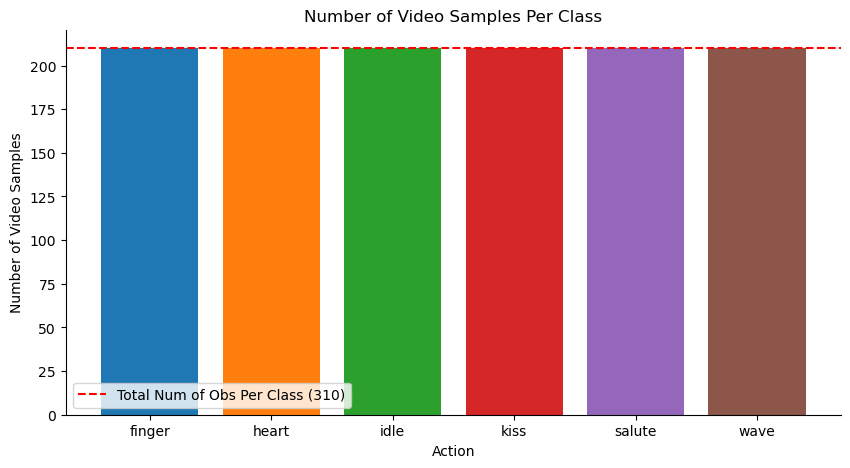

In [199]:
# Double check number of observations per class and number of frames per class
plt.figure(figsize=(10, 5))
for a in pose_df['action'].unique():
    new_df = pose_df[pose_df['action']=='wave']
    x = new_df['video sample number'].nunique()
    plt.bar(a, x)
    print(f'there are {x} video samples in the {a} class')
    frame_df = new_df.groupby('video sample number')['frame number'].count()
    #print(frame_df)
    min_frame = frame_df.min()
    max_frame = frame_df.max()
    print(f'the minimum number of frames in a given sample for {a} class is {min_frame}')
    print(f'the maximum number of frames in a given sample for {a} class is {max_frame}')
    print('\n')

total_missing_values = []
for df in [pose_df, face_df, lh_df, rh_df]:
    total_missing_values.append(df.isnull().sum().sum())
    
print(f'there are {sum(total_missing_values)} missing values across all rows and columns')


plt.title('Number of Video Samples Per Class')
plt.xlabel('Action')
plt.ylabel('Number of Video Samples')
plt.axhline(y=210, color='red', linestyle="--", label='Total Num of Obs Per Class (310)')
plt.legend()
sns.despine()
plt.show()

Since the data was split vertically, along the features, the number of observations are the exact same across all four body part dataframes. Therefore, we can simply look at one for the summary statistics.

We see that there are indeed 210 video samples for each category, and each video sample contains exactly 40 frames. This is exactly what we want and we see that there are no missing values in any column.

Now we've confirmed the data is intact, let's move on to some more interesting exploration. Since the data is sequential, we want to analyze the landmark location data over the entire sequence. To do this, we'll group by the action to calculate the statistics for each class. Since we have so many different landmarks, most of which are very close together, we will only focus on a select few landmarks. The landmarks which will be selected are on parts of the body which have a lot of movement, as these landmarks should be more important in predicting the action being performed than parts of the body that are  static throughout the sequence (i.e. your face is stil in all of these motions and it's location shouldn't be a key factor in predicting a motion).

Below are the landmarks generated by Google's MediaPipe Holistic model. 

### Hand Landmark List

![Alt text](https://camo.githubusercontent.com/b0f077393b25552492ef5dd7cd9fd13f386e8bb480fa4ed94ce42ede812066a1/68747470733a2f2f6d65646961706970652e6465762f696d616765732f6d6f62696c652f68616e645f6c616e646d61726b732e706e67)

### Pose Landmark List
![Alt text](https://camo.githubusercontent.com/7fbec98ddbc1dc4186852d1c29487efd7b1eb820c8b6ef34e113fcde40746be2/68747470733a2f2f6d65646961706970652e6465762f696d616765732f6d6f62696c652f706f73655f747261636b696e675f66756c6c5f626f64795f6c616e646d61726b732e706e67)

### Face Mesh Landmark List

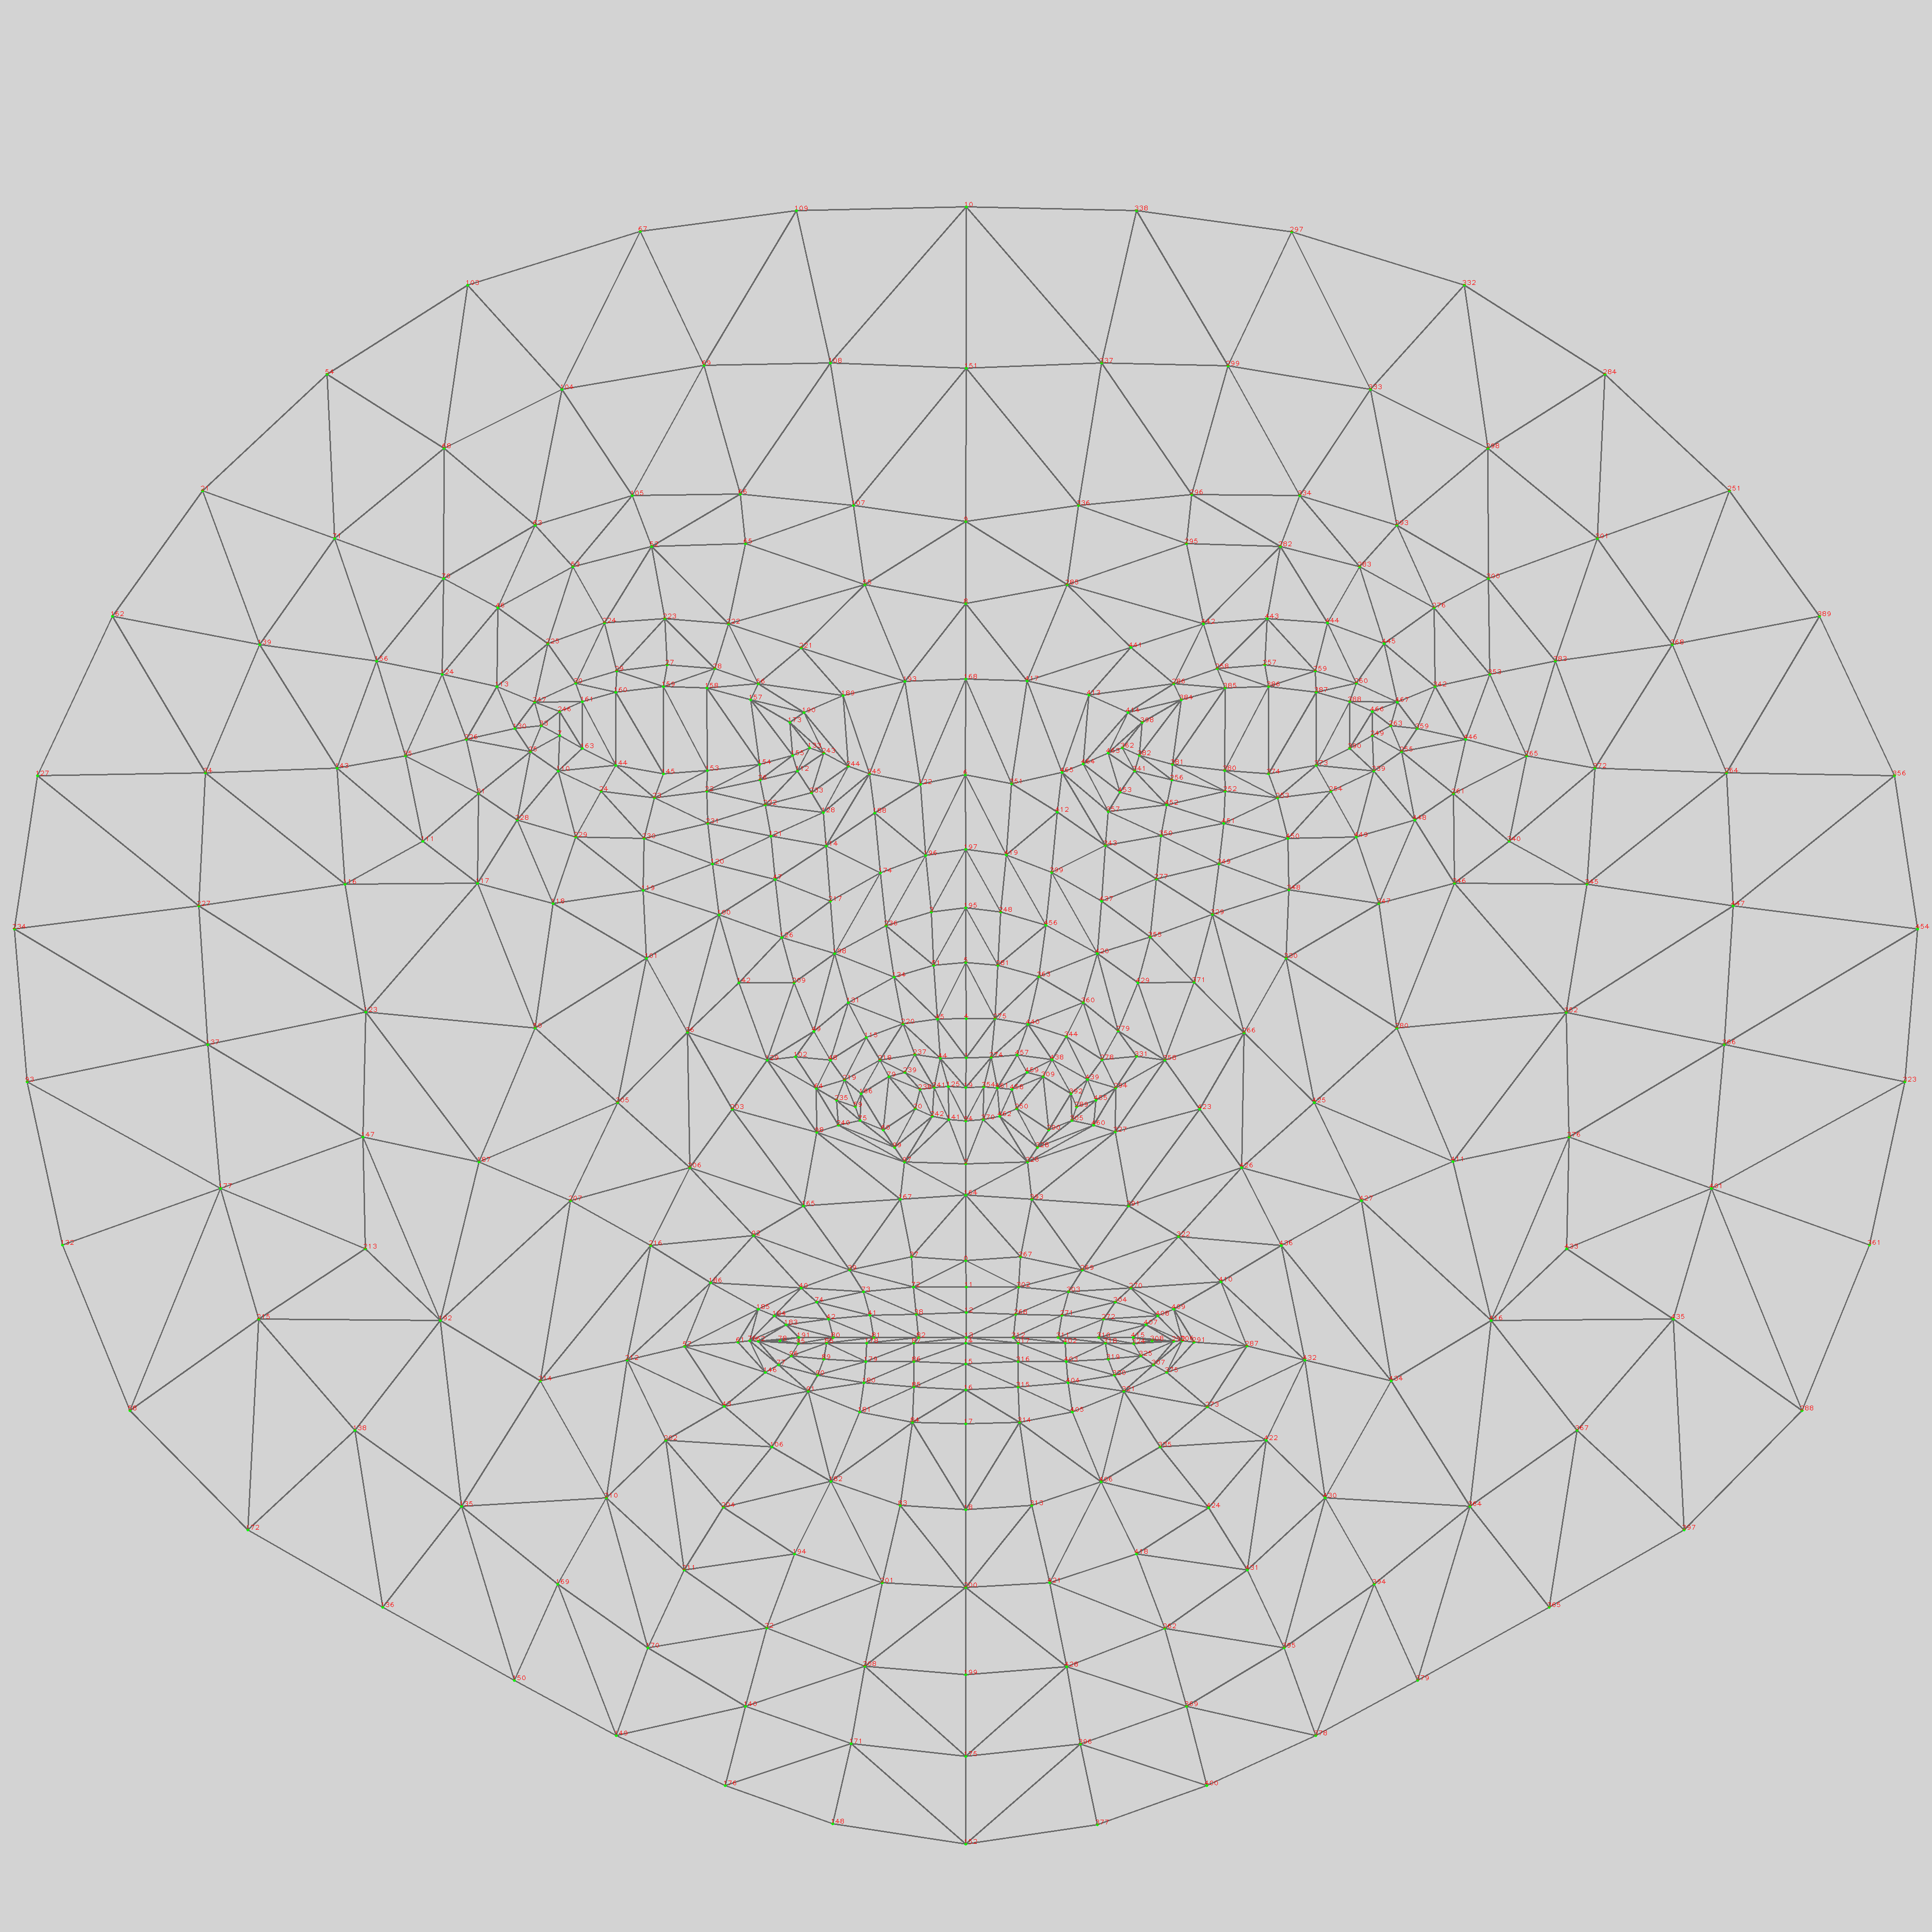

To start, let's focus on the wrist landmarks on both hands,  and the nose landmark.

Let's subset these points out.

In [93]:
lh_wrist = lh_df.loc[:, [0,1,2, 'action', 'video sample number', 'frame number']]
rh_wrist = rh_df.loc[:, [0,1,2, 'action', 'video sample number', 'frame number']]
pose_nose = pose_df.loc[:, [0,1,2, 'action', 'video sample number', 'frame number']]
lh_wrist

0    1    2  action video sample number frame number
0      0.0  0.0  0.0  finger                   0            0
1      0.0  0.0  0.0  finger                   0            1
2      0.0  0.0  0.0  finger                   0            2
3      0.0  0.0  0.0  finger                   0            3
4      0.0  0.0  0.0  finger                   0            4
...    ...  ...  ...     ...                 ...          ...
50395  0.0  0.0  0.0    wave                 209           35
50396  0.0  0.0  0.0    wave                 209           36
50397  0.0  0.0  0.0    wave                 209           37
50398  0.0  0.0  0.0    wave                 209           38
50399  0.0  0.0  0.0    wave                 209           39

[50400 rows x 6 columns]

In [229]:
def get_summary_stats(df, landmark, action=None):
    if action != None:
        df = df[df['action']==action]
        print(f'ACTION: {action}')
    print(f'Minimum x-value for {landmark} landmark is: {df.loc[:, 0].min()}')
    print(f'Maximum x-value for {landmark} landmark is: {df.loc[:, 0].max()}')
    print(f'Average x-value for {landmark} landmark is: {df.loc[:, 0].mean()}')
    print('\n')
    
    print(f'Minimum y-value for {landmark} landmark is: {df.loc[:, 1].min()}')
    print(f'Maximum y-value for {landmark} landmark is: {df.loc[:, 1].max()}')
    print(f'Average y-value for {landmark} landmark is: {df.loc[:, 1].mean()}')
    print('\n')
    
get_summary_stats(lh_wrist, "left hand wrist")
get_summary_stats(rh_wrist, "right hand wrist")
get_summary_stats(pose_nose, "nose")

Minimum x-value for left hand wrist landmark is: 0.0
Maximum x-value for left hand wrist landmark is: 1.0553977489471436
Average x-value for left hand wrist landmark is: 0.32617041105315797


Minimum y-value for left hand wrist landmark is: 0.0
Maximum y-value for left hand wrist landmark is: 1.2372480630874634
Average y-value for left hand wrist landmark is: 0.349448462543743


Minimum x-value for right hand wrist landmark is: -0.06133582070469856
Maximum x-value for right hand wrist landmark is: 0.7773904800415039
Average x-value for right hand wrist landmark is: 0.20825334850632188


Minimum y-value for right hand wrist landmark is: 0.0
Maximum y-value for right hand wrist landmark is: 1.1521397829055786
Average y-value for right hand wrist landmark is: 0.3701953814830631


Minimum x-value for nose landmark is: 0.0
Maximum x-value for nose landmark is: 1.1278154850006104
Average x-value for nose landmark is: 0.5107479564985999


Minimum y-value for nose landmark is: 0.0
Maximum y-va

Each landmark value has a corresponding x, y, z value which can have a value between 0-1 (value is normalized by the image width and height respectively). However, values can actually exceed these bounds as MediaPipe will try to estimate the location of a landmark if it is out of frame, based on other close by landmarks in the frame.

It is important to note that gestures can be done with **either** hand. When a body group is not in frame, all the landmark values are set to zero.

The above summary statistics aren't particularly helpful as they represent the min, max, and average positions across all action classes. To see if we can find any more meaning, let's take the average (x,y) positions for each frame and plot them to see if we can find any patterns between groups.

### Hand Location Analysis

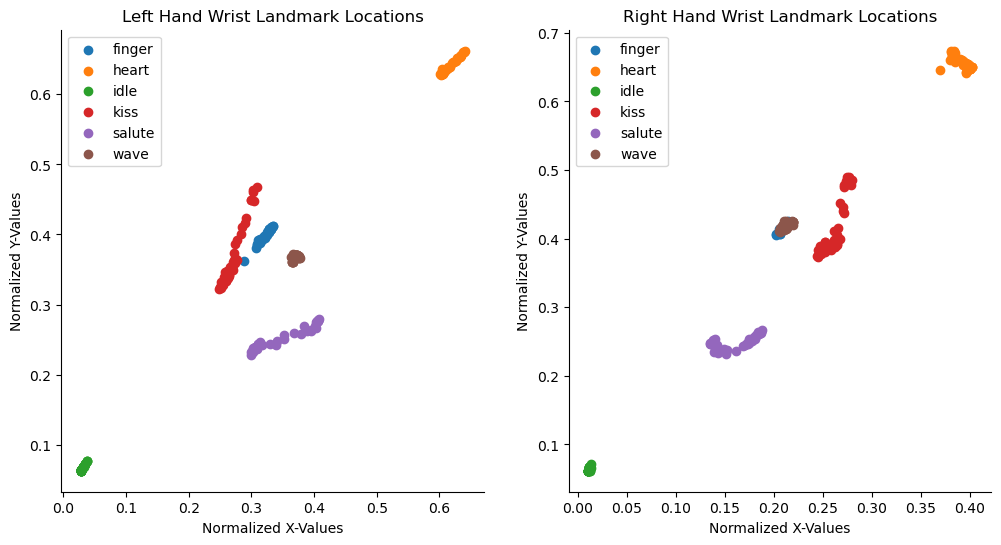

In [129]:
actions = lh_wrist['action'].unique()

plt.subplots(1,2, figsize=(12, 6))
for i, hand_df in enumerate([lh_wrist, rh_wrist]):
    for a in actions:
        x = hand_df[hand_df['action']==a]
        x = x.groupby('frame number').mean().loc[:, [0, 1]]
        plt.subplot(1,2,i+1)
        plt.scatter(x.loc[:,0], x.loc[:, 1], label=a)
        plt.xlabel('Normalized X-Values')
        plt.ylabel('Normalized Y-Values')
        plt.legend()
        if i+1 == 1:
            graph_title = 'Left Hand Wrist Landmark Locations'
        else:
            graph_title = 'Right Hand Wrist Landmark Locations'
        plt.title(graph_title)

sns.despine()
plt.show()

Above we see the right and left hand wrist landmark's average x & y location across the 40 frame video. From this we can see the general path traveled by each hand for a given action. It is very encouraging to see that each action is displaying paths that are distinctly separable from each other and easily clustered into their respective class. It needs to be noted that the important factor is the **path** that each action takes, and not necessarily where the cluster is located on the cartesian plane. This is because we want the model to identify the action regardless of where the person is standing and performing their action in the video frame. In other words, we want the model to learn the general motion of a wave, opposed to learning where that motion happened in the frame. 

Key observations are:

1. Idle classification was introduced to identify when no movement is happening. These videos have subjects with their hands down by their sides with no movement throughout the clip. As expected, we see that there is almost no change in the average location of the wrist landmarks throughout the video sequence. Wrist landmarks almost always have a x & y value close to 0, as hands are often out of frame here, with very little variation throughout the video sequence.

2. The salute action starts with the hand near the forehead and extends out in a straight horizontal motion. When looking at the salute data, we see that the average paths traveled by the left and right hands are longer along the x-axis with some slight movement along the y-axis. This represents the horizontal extension that we expect from a salute.

3. On the other hand, the kiss motion has much more movement along the y-axis and a smaller amount of variation on the x-axis. Again, this is expected as "blowing a kiss" involves raising your hand up to your mouth and then bringing it down slightly to "blow" the kiss away - creating a lot of movement in the y-direction.

4. The middle finger data also shows a bit of movement along the y-axis as the hand is brought up to extend the middle finger. However, this movement is upward movement is fairly muted for the right hand data, where most of the video clips had the hand already in an upright position with the only motion coming from the finger extending. 

5. The wave data is the most surprising as it has very little variation along the x-axis. As your hand typically moves back and forth along the x-axis to perform the waving motion, I was expecting to see a much wider dispersion across the video sequence. After rewatching the raw videos, this observation is not a mistake, as the majority of videos collected have the subject performing the wave motion by rotating the hand at the **wrist** opposed to the elbow. This particular motion holds the wrist in a relatively stable location throughout the movement. 

6. The heart data is also interesting at first glance. It appears that the average wrist location for both hands is much greater than the other classes, on both the x & y axis, but this result is actually very misleading due to the way the data is extracted and processed. For all of the other classes the action is performed by either the right or left hand, meaning that in many circumstances the idle hand is not within the frame. When a hand is not in the frame, we cannot extract its location and simply pass through zeros for it's landmark locations. Since we have taken the average across all video samples, the instances where the action was performed by the opposite hand are pulling the averages down for all classes but the heart, which requires both hands to be in frame. In terms of movement, we don't expect to see much on either the x or y axis over time, as it's a relatively short path to connect two hands to form a heart. We see a bit more variation in the left hand locations, but the right hand locations are pretty closely bunched together as expected. 

Overall, it looks like there are some pretty distinguishable movement trends between the different classes, which models should be able to pick up on. A potential area of concern, if we were to only use the wrist location data, is the lack of movement between the wave and middle finger. This coupled with the similar location of the hand(s) in both cases, could make it difficult to effectively identify the two different classes.   



Below is another visualization of the x, y movement for each of the different classes. 

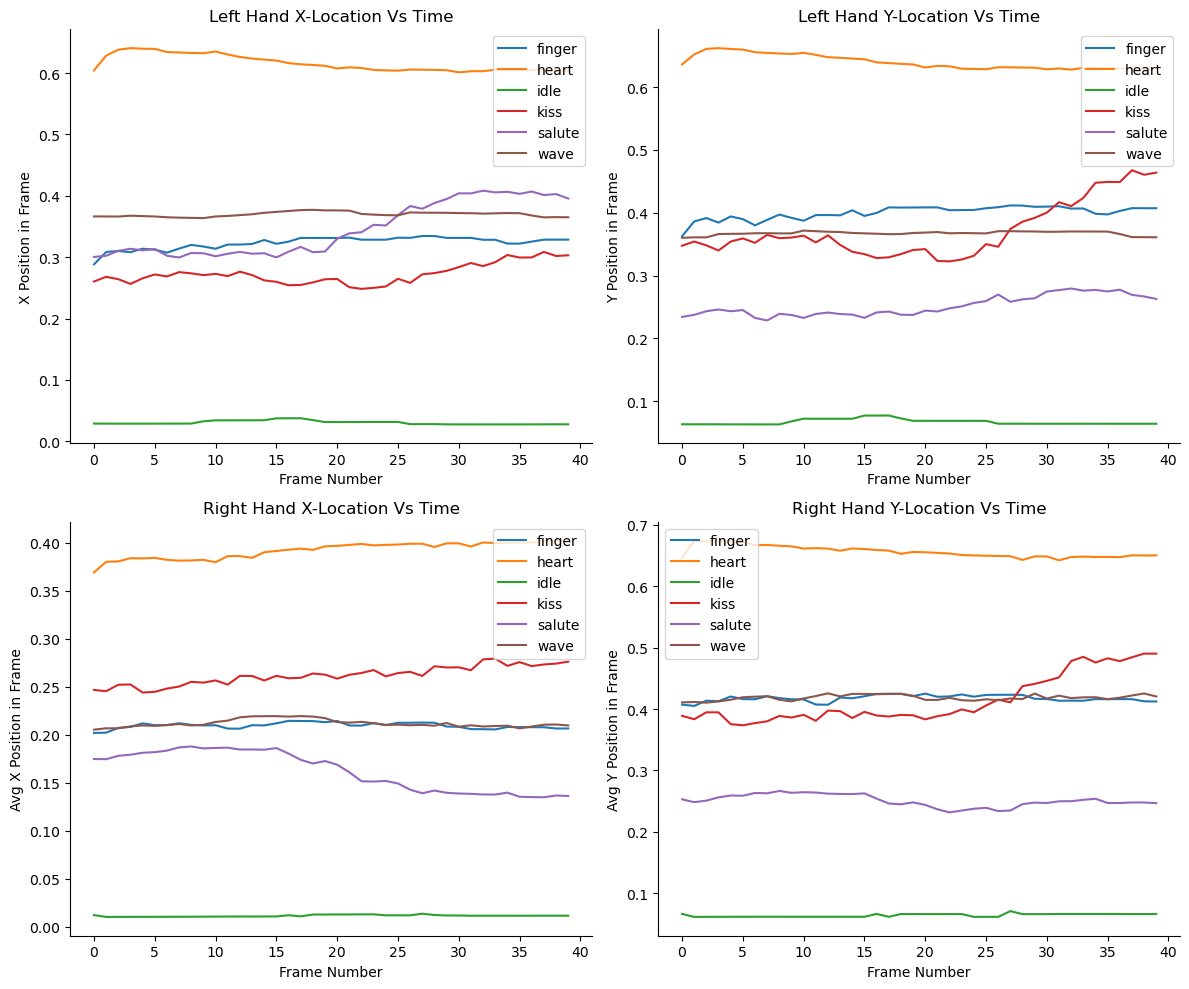

In [169]:
actions = lh_wrist['action'].unique()

plt.subplots(2,2, figsize=(12, 10))
for i in range(2):
    for a in actions:
        x = lh_wrist[lh_wrist['action']==a]
        x = x.groupby('frame number').mean().loc[:, [0, 1]]
        x.index = x.index.astype(int)
        x = x.sort_index()
        plt.subplot(2,2,i+1)
        plt.plot(x.index, x.loc[:, i], label=a)
        plt.xlabel('Frame Number')
        
        plt.legend()
        if i+1 == 1:
            graph_title = 'Left Hand X-Location Vs Time'
            yaxis = 'X Position in Frame'
        else:
            graph_title = 'Left Hand Y-Location Vs Time'
            yaxis = 'Y Position in Frame'
        plt.title(graph_title)
        plt.ylabel(yaxis)



for i in range(2):
    for a in actions:
        x = rh_wrist[rh_wrist['action']==a]
        x = x.groupby('frame number').mean().loc[:, [0, 1]]
        x.index = x.index.astype(int)
        x = x.sort_index()
        plt.subplot(2, 2, 2+i+1)
        plt.plot(x.index, x.loc[:, i], label=a)
        plt.xlabel('Frame Number')
        
        plt.legend()
        if i+1 == 1:
            graph_title = 'Right Hand X-Location Vs Time'
            yaxis = 'Avg X Position in Frame'
        else:
            graph_title = 'Right Hand Y-Location Vs Time'
            yaxis = 'Avg Y Position in Frame'
        plt.title(graph_title)
        plt.ylabel(yaxis)

plt.tight_layout()
sns.despine()
plt.show()


Here we can see the average x, y movement of the hands throughout the video sequences. Again we see that kiss has a decent amount of movement in the y-direction while salute is active across the x-axis. The other actions don't show a ton of average movement across the sequence.

Another useful metric to analyze the path taken by each action is to look at the x & y variance - which measures how spread out the data is across the two dimensions. Variances for each class, across both the x & y axis, are below and reinforce our previous observations.

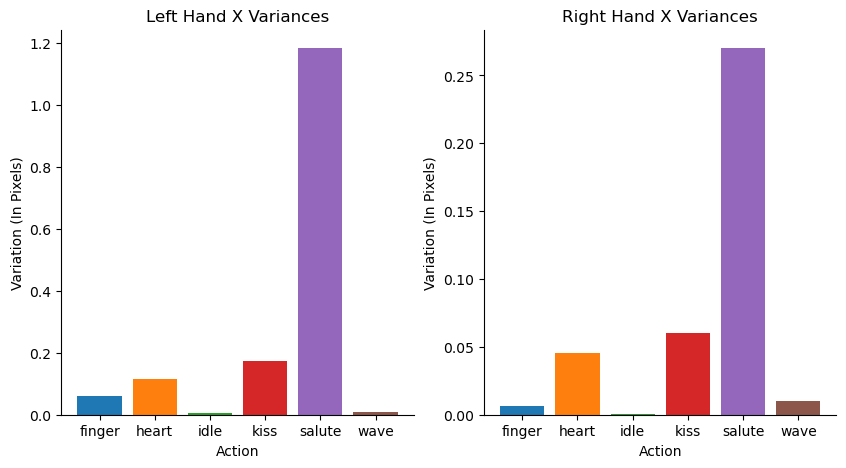

In [222]:
# Plot the X Variances
# Create variance lists to store results
action_list = []
lh_variance = []
rh_variance = []


for a in actions:
    # subset out specific action data
    x = lh_wrist[lh_wrist['action']==a]
    # group by frame number to get average x & y locations
    x = x.groupby('frame number').mean().loc[:, [0, 1]]
    # append to variance list - converting normalized value back to pixel value
    lh_variance.append(round((x.loc[:, 0].var())*640, 7))
    
    # repeat above steps for right hand wrist landmark
    x = rh_wrist[rh_wrist['action']==a]
    x = x.groupby('frame number').mean().loc[:, [0, 1]]
    rh_variance.append(round((x.loc[:, 0].var())*640, 7))
    
    action_list.append(a)

# Plot action variances for both right and left hands
plt.subplots(1,2, figsize=(10,5))
plt.subplot(1,2,1)
for i in range(len(lh_variance)):
    plt.bar(action_list[i], lh_variance[i])
    plt.title('Left Hand X Variances')
    plt.xlabel('Action')
    plt.ylabel('Variation (In Pixels)')

plt.subplot(1,2,2)
for i in range(len(rh_variance)):
    plt.bar(action_list[i], rh_variance[i])
    plt.title('Right Hand X Variances')
    plt.xlabel('Action')
    plt.ylabel('Variation (In Pixels)')
sns.despine()
plt.show()

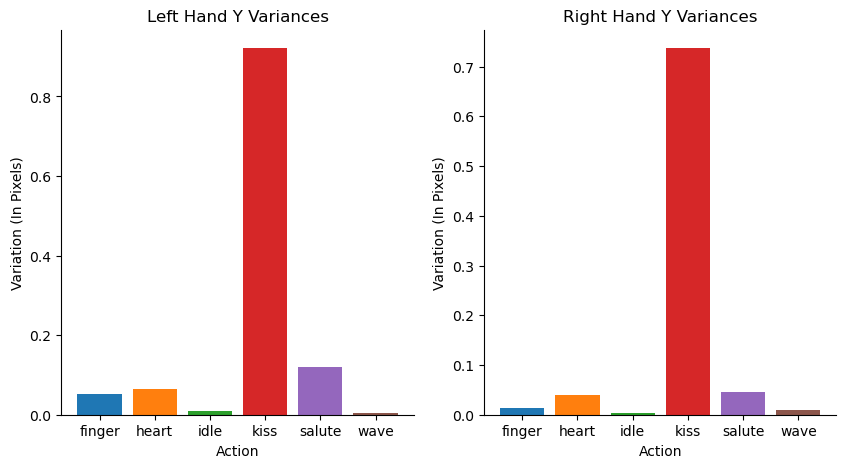

In [221]:
# Plot the Y Variances
# Repeating the same code as previous block
action_list = []
lh_variance = []
rh_variance = []

for a in actions:
    x = lh_wrist[lh_wrist['action']==a]
    x = x.groupby('frame number').mean().loc[:, [0, 1]]
    # multiply by 480 (height of video in pixels) instead of 640 (width)
    lh_variance.append(round((x.loc[:, 1].var())*480, 7)) 
    
    x = rh_wrist[rh_wrist['action']==a]
    x = x.groupby('frame number').mean().loc[:, [0, 1]]
    rh_variance.append(round((x.loc[:, 1].var())*480, 7))
    
    action_list.append(a)

plt.subplots(1,2, figsize=(10,5))
plt.subplot(1,2,1)
for i in range(len(lh_variance)):
    plt.bar(action_list[i], lh_variance[i])
    plt.title('Left Hand Y Variances')
    plt.xlabel('Action')
    plt.ylabel('Variation (In Pixels)')

plt.subplot(1,2,2)
for i in range(len(rh_variance)):
    plt.bar(action_list[i], rh_variance[i])
    plt.title('Right Hand Y Variances')
    plt.xlabel('Action')
    plt.ylabel('Variation (In Pixels)')
sns.despine()
plt.show()

### Face Location Analysis

As mentioned previously, I am not expecting the facial location data to be a useful predictor as faces should be relatively static (i.e. no motion) during these actions. Let's explore this briefly to make sure we don't overlook any trends.

To analyse the facial location data, we will use the nose landmark as it is a central feature and should provide a good estimate for the overall movement of the head during the sequences. The nose landmark is the first landmark in the pose group.

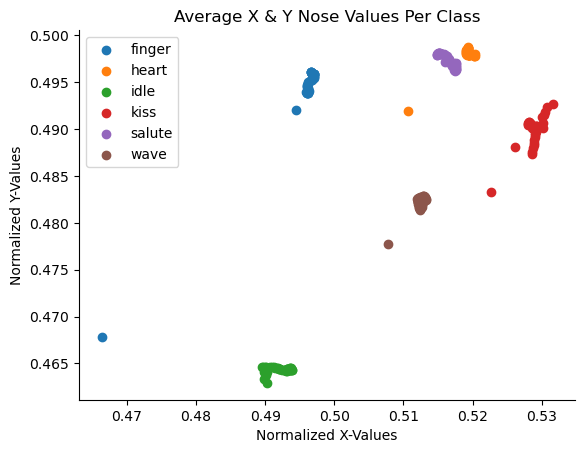

In [226]:
actions = pose_nose['action'].unique()

plt.figure()
for a in actions:
    x = pose_nose[pose_nose['action']==a]
    x = x.groupby('frame number').mean().loc[:, [0, 1]]
    plt.scatter(x.loc[:,0], x.loc[:, 1], label=a)
    plt.xlabel('Normalized X-Values')
    plt.ylabel('Normalized Y-Values')
    plt.legend()
    plt.title('Average X & Y Nose Values Per Class')

sns.despine()
plt.show()

# Plot the X Variances
# Create variance lists to store results
action_list = []
lh_variance = []
rh_variance = []


for a in actions:
    # subset out specific action data
    x = lh_wrist[lh_wrist['action']==a]
    # group by frame number to get average x & y locations
    x = x.groupby('frame number').mean().loc[:, [0, 1]]
    # append to variance list - converting normalized value back to pixel value
    lh_variance.append(round((x.loc[:, 0].var())*640, 7))
    
    # repeat above steps for right hand wrist landmark
    x = rh_wrist[rh_wrist['action']==a]
    x = x.groupby('frame number').mean().loc[:, [0, 1]]
    rh_variance.append(round((x.loc[:, 0].var())*640, 7))
    
    action_list.append(a)

# Plot action variances for both right and left hands
plt.subplots(1,2, figsize=(10,5))
plt.subplot(1,2,1)
for i in range(len(lh_variance)):
    plt.bar(action_list[i], lh_variance[i])
    plt.title('Left Hand X Variances')
    plt.xlabel('Action')
    plt.ylabel('Variation (In Pixels)')

plt.subplot(1,2,2)
for i in range(len(rh_variance)):
    plt.bar(action_list[i], rh_variance[i])
    plt.title('Right Hand X Variances')
    plt.xlabel('Action')
    plt.ylabel('Variation (In Pixels)')
sns.despine()
plt.show()

On first glance it does indeed appear that the nose location is a good way to separate and cluster the groups, but remember that we primarily care about the movement within the video samples and not the particular location of a body part. In this graph it does appear that there is some movement of the head, but it is very small when compared to the movements of the hands. Keep in mind that x-axis scale is between 0.46-0.54 and the y-axis is between 0.460-0.5, a much smaller scale than the left hand wrist graph which has an x-axis between 0-0.7 and y-axis between 0-0.7. 

If we were to plot these points on the left hand graph, they would all be very tightly clustered together and I would be very suprised if the nose position is a key explanatory feature.

### Elbow Joint Analysis

Following the theme of analyzing the landmarks which experience a lot of movement throughout the action, we will look at the elbow landmarks next (which are the 13th & 14th landmarks within the pose group).

Mapping out x, y, z, visibility positions for each landmark



|X, Y, Z, Visibility Columns | Landmark Number|
|--|--|
|0, 1, 2, 3 | landmark 0 |
|4, 5, 6, 7 | landmark 1 |
|8, 9, 10, 11 | landmark 2 | 
|12, 13, 14, 15 | landmark 3 |
|16, 17, 18, 19 | landmark 4 | 
|20, 21, 22, 23 | landmark 5 |
|24, 25, 26, 27 | landmark 6 |
|28, 29, 30, 31 | landmark 7 |
|32, 33, 34, 35 | landmark 8 |
|36, 37, 38, 39 | landmark 9 |
|40, 41, 42, 43 | landmark 10 |
|44, 45, 46, 47 | landmark 11 |
|48, 49, 50, 51 | landmark 12 |
|52, 53, 54, 55 | landmark 13 |
|56, 57, 58, 59 | landmark 14 |

In [238]:
# subset out left and right x & y elbow data
left_elbow = pose_df.loc[:, [52, 53, 'action', 'video sample number', 'frame number']]
right_elbow = pose_df.loc[:, [56, 57, 'action', 'video sample number', 'frame number']]

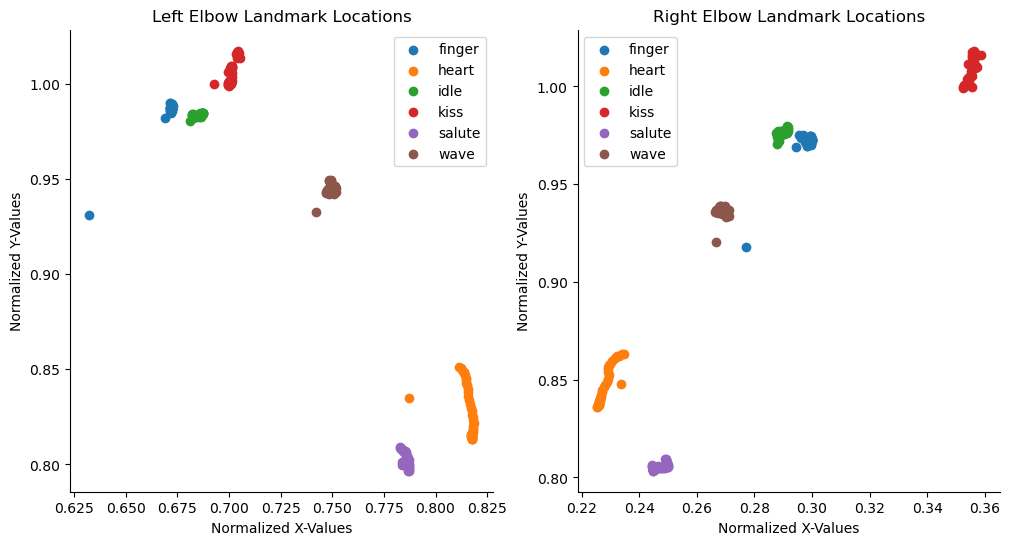

In [242]:
actions = left_elbow['action'].unique()

# plot left and right elbow average location data for each frame
plt.subplots(1,2, figsize=(12, 6))

# loop through each action and plot left elbow data
for a in actions:
    # subset out specific action data
    x = left_elbow[left_elbow['action']==a]
    # group by frame and average the x, y values
    x = x.groupby('frame number').mean().loc[:, [52, 53]]
    # plot left elbow data on first subplot
    plt.subplot(1,2,1)
    plt.scatter(x.loc[:,52], x.loc[:, 53], label=a)
    graph_title = 'Left Elbow Landmark Locations'
    plt.title(graph_title)
    plt.xlabel('Normalized X-Values')
    plt.ylabel('Normalized Y-Values')
    plt.legend()


#loop through each action and plot right elbow data
for a in actions:
    # subset out specific action data
    x = right_elbow[right_elbow['action']==a]
    # group by frame and average the x, y values
    x = x.groupby('frame number').mean().loc[:, [56, 57]] #update correct x, y cols
    # plot right elbow data on second subplot
    plt.subplot(1,2,2)
    plt.scatter(x.loc[:,56], x.loc[:, 57], label=a)
    graph_title = 'Right Elbow Landmark Locations'
    plt.title(graph_title)
    plt.xlabel('Normalized X-Values')
    plt.ylabel('Normalized Y-Values')
    plt.legend()

sns.despine()
plt.show()


In [76]:
action_list = []
video_num_list = []
frame_num_list = []
pose_list = []
face_list = []
left_hand_list = []
right_hand_list = []

# instantiate mediapipe model
model = Pipe()

# set directory for raw data and directory for data post processing
root_raw = './Raw_Data'
root_processed = './Processed_Data'

raw_data_files = os.listdir(root_raw)
actions = ['wave', 'salute', 'kiss', 'idle', 'heart', 'finger']

# set up holistic model
with model.mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for file in raw_data_files:
        print(file)
        for action in actions:
            file_path = os.path.join(root_processed, action, file)
            if os.path.isdir(file_path)==False:
                pass
            for video_num in range(model.num_sample_videos):
                print(file, action, video_num)
                file_path = os.path.join(root_processed, action, file, str(video_num))
                if os.path.isdir(file_path)==False:
                    pass
                
                for frame_num in range(model.frames_per_seq):

                    # create the path to the raw video frame
                    frame_path = os.path.join(root_raw, file, action, str(video_num), str(frame_num) + '.npy')
                    
                    
                    # load the numpy frame
                    frame = np.load(frame_path)

                    # make mediapipe detections
                    frame, results = model.pose_detection(frame, holistic)

                    # draw landmarks on frame to be rendered
                    #model.draw_landmarks(frame, results)

                    #cv2.imshow('frame', frame)

                    # extract pose, face, lh, & rh landmarks
                    pose_lm, face_lm, left_hand_lm, right_hand_lm = model.extract_landmarks2(results)
                    
                    
                    action_list.append(action)
                    video_num_list.append(video_num)
                    frame_num_list.append(frame_num)
                    
                    pose_list.append(pose_lm)
                    face_list.append(face_lm)
                    left_hand_list.append(left_hand_lm)
                    right_hand_list.append(right_hand_lm)
                    

Dev_sitting_Data
Dev_sitting_Data wave 0
Dev_sitting_Data wave 1
Dev_sitting_Data wave 2
Dev_sitting_Data wave 3
Dev_sitting_Data wave 4
Dev_sitting_Data wave 5
Dev_sitting_Data wave 6
Dev_sitting_Data wave 7
Dev_sitting_Data wave 8
Dev_sitting_Data wave 9
Dev_sitting_Data wave 10
Dev_sitting_Data wave 11
Dev_sitting_Data wave 12
Dev_sitting_Data wave 13
Dev_sitting_Data wave 14
Dev_sitting_Data wave 15
Dev_sitting_Data wave 16
Dev_sitting_Data wave 17
Dev_sitting_Data wave 18
Dev_sitting_Data wave 19
Dev_sitting_Data wave 20
Dev_sitting_Data wave 21
Dev_sitting_Data wave 22
Dev_sitting_Data wave 23
Dev_sitting_Data wave 24
Dev_sitting_Data wave 25
Dev_sitting_Data wave 26
Dev_sitting_Data wave 27
Dev_sitting_Data wave 28
Dev_sitting_Data wave 29
Dev_sitting_Data salute 0
Dev_sitting_Data salute 1
Dev_sitting_Data salute 2
Dev_sitting_Data salute 3
Dev_sitting_Data salute 4
Dev_sitting_Data salute 5
Dev_sitting_Data salute 6
Dev_sitting_Data salute 7
Dev_sitting_Data salute 8
Dev_sitti

Kieran_table_Data heart 17
Kieran_table_Data heart 18
Kieran_table_Data heart 19
Kieran_table_Data heart 20
Kieran_table_Data heart 21
Kieran_table_Data heart 22
Kieran_table_Data heart 23
Kieran_table_Data heart 24
Kieran_table_Data heart 25
Kieran_table_Data heart 26
Kieran_table_Data heart 27
Kieran_table_Data heart 28
Kieran_table_Data heart 29
Kieran_table_Data finger 0
Kieran_table_Data finger 1
Kieran_table_Data finger 2
Kieran_table_Data finger 3
Kieran_table_Data finger 4
Kieran_table_Data finger 5
Kieran_table_Data finger 6
Kieran_table_Data finger 7
Kieran_table_Data finger 8
Kieran_table_Data finger 9
Kieran_table_Data finger 10
Kieran_table_Data finger 11
Kieran_table_Data finger 12
Kieran_table_Data finger 13
Kieran_table_Data finger 14
Kieran_table_Data finger 15
Kieran_table_Data finger 16
Kieran_table_Data finger 17
Kieran_table_Data finger 18
Kieran_table_Data finger 19
Kieran_table_Data finger 20
Kieran_table_Data finger 21
Kieran_table_Data finger 22
Kieran_table_Da

Liam_Kitchen_Data salute 26
Liam_Kitchen_Data salute 27
Liam_Kitchen_Data salute 28
Liam_Kitchen_Data salute 29
Liam_Kitchen_Data kiss 0
Liam_Kitchen_Data kiss 1
Liam_Kitchen_Data kiss 2
Liam_Kitchen_Data kiss 3
Liam_Kitchen_Data kiss 4
Liam_Kitchen_Data kiss 5
Liam_Kitchen_Data kiss 6
Liam_Kitchen_Data kiss 7
Liam_Kitchen_Data kiss 8
Liam_Kitchen_Data kiss 9
Liam_Kitchen_Data kiss 10
Liam_Kitchen_Data kiss 11
Liam_Kitchen_Data kiss 12
Liam_Kitchen_Data kiss 13
Liam_Kitchen_Data kiss 14
Liam_Kitchen_Data kiss 15
Liam_Kitchen_Data kiss 16
Liam_Kitchen_Data kiss 17
Liam_Kitchen_Data kiss 18
Liam_Kitchen_Data kiss 19
Liam_Kitchen_Data kiss 20
Liam_Kitchen_Data kiss 21
Liam_Kitchen_Data kiss 22
Liam_Kitchen_Data kiss 23
Liam_Kitchen_Data kiss 24
Liam_Kitchen_Data kiss 25
Liam_Kitchen_Data kiss 26
Liam_Kitchen_Data kiss 27
Liam_Kitchen_Data kiss 28
Liam_Kitchen_Data kiss 29
Liam_Kitchen_Data idle 0
Liam_Kitchen_Data idle 1
Liam_Kitchen_Data idle 2
Liam_Kitchen_Data idle 3
Liam_Kitchen_Data 

Liam_Standing_Data wave 4
Liam_Standing_Data wave 5
Liam_Standing_Data wave 6
Liam_Standing_Data wave 7
Liam_Standing_Data wave 8
Liam_Standing_Data wave 9
Liam_Standing_Data wave 10
Liam_Standing_Data wave 11
Liam_Standing_Data wave 12
Liam_Standing_Data wave 13
Liam_Standing_Data wave 14
Liam_Standing_Data wave 15
Liam_Standing_Data wave 16
Liam_Standing_Data wave 17
Liam_Standing_Data wave 18
Liam_Standing_Data wave 19
Liam_Standing_Data wave 20
Liam_Standing_Data wave 21
Liam_Standing_Data wave 22
Liam_Standing_Data wave 23
Liam_Standing_Data wave 24
Liam_Standing_Data wave 25
Liam_Standing_Data wave 26
Liam_Standing_Data wave 27
Liam_Standing_Data wave 28
Liam_Standing_Data wave 29
Liam_Standing_Data salute 0
Liam_Standing_Data salute 1
Liam_Standing_Data salute 2
Liam_Standing_Data salute 3
Liam_Standing_Data salute 4
Liam_Standing_Data salute 5
Liam_Standing_Data salute 6
Liam_Standing_Data salute 7
Liam_Standing_Data salute 8
Liam_Standing_Data salute 9
Liam_Standing_Data salut

William_desk_Data heart 8
William_desk_Data heart 9
William_desk_Data heart 10
William_desk_Data heart 11
William_desk_Data heart 12
William_desk_Data heart 13
William_desk_Data heart 14
William_desk_Data heart 15
William_desk_Data heart 16
William_desk_Data heart 17
William_desk_Data heart 18
William_desk_Data heart 19
William_desk_Data heart 20
William_desk_Data heart 21
William_desk_Data heart 22
William_desk_Data heart 23
William_desk_Data heart 24
William_desk_Data heart 25
William_desk_Data heart 26
William_desk_Data heart 27
William_desk_Data heart 28
William_desk_Data heart 29
William_desk_Data finger 0
William_desk_Data finger 1
William_desk_Data finger 2
William_desk_Data finger 3
William_desk_Data finger 4
William_desk_Data finger 5
William_desk_Data finger 6
William_desk_Data finger 7
William_desk_Data finger 8
William_desk_Data finger 9
William_desk_Data finger 10
William_desk_Data finger 11
William_desk_Data finger 12
William_desk_Data finger 13
William_desk_Data finger 1

[array([[ 0.62139463,  0.61899555, -0.57075924],
        [ 0.63547838,  0.58960539, -0.53199059],
        [ 0.64209563,  0.59026396, -0.53186697],
        [ 0.649185  ,  0.59136951, -0.53208214],
        [ 0.61067063,  0.5891301 , -0.52712667],
        [ 0.60049927,  0.58935654, -0.52708548],
        [ 0.5901683 ,  0.58997077, -0.527349  ],
        [ 0.66292614,  0.61428249, -0.28666496],
        [ 0.57753891,  0.60831624, -0.25491953],
        [ 0.63363153,  0.65188694, -0.48416367],
        [ 0.60248423,  0.65100598, -0.47592935],
        [ 0.73087412,  0.81132686, -0.16508675],
        [ 0.50593758,  0.75062978, -0.21128769],
        [ 0.75337756,  1.02849782, -0.13518459],
        [ 0.35521862,  0.82366157, -0.61395794],
        [ 0.77092582,  1.24169946, -0.1940465 ],
        [ 0.48589009,  0.59859502, -1.01980472],
        [ 0.78303361,  1.30377889, -0.23038106],
        [ 0.51354825,  0.54386032, -1.12646961],
        [ 0.7592485 ,  1.2984823 , -0.25099528],
        [ 0.52758789

In [9]:
pose_list = np.array(pose_list)
face_list = np.array(face_list)
left_hand_list = np.array(left_hand_list)
right_hand_list = np.array(right_hand_list)
action_list = np.array(action_list)
video_num_list = np.array(video_num_list)
frame_num_list = np.array(frame_num_list)

C:\Users\lmoor\AppData\Local\Temp\ipykernel_43484\3435783562.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  face_list = np.array(face_list)
C:\Users\lmoor\AppData\Local\Temp\ipykernel_43484\3435783562.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  left_hand_list = np.array(left_hand_list)
C:\Users\lmoor\AppData\Local\Temp\ipykernel_43484\3435783562.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you 

In [64]:
for i in range(len(pose_list)):
    pose_list[i] = pose_list[i].flatten()
pose_list[0]

array([ 0.62139463,  0.61899555, -0.57075924,  0.63547838,  0.58960539,
       -0.53199059,  0.64209563,  0.59026396, -0.53186697,  0.649185  ,
        0.59136951, -0.53208214,  0.61067063,  0.5891301 , -0.52712667,
        0.60049927,  0.58935654, -0.52708548,  0.5901683 ,  0.58997077,
       -0.527349  ,  0.66292614,  0.61428249, -0.28666496,  0.57753891,
        0.60831624, -0.25491953,  0.63363153,  0.65188694, -0.48416367,
        0.60248423,  0.65100598, -0.47592935,  0.73087412,  0.81132686,
       -0.16508675,  0.50593758,  0.75062978, -0.21128769,  0.75337756,
        1.02849782, -0.13518459,  0.35521862,  0.82366157, -0.61395794,
        0.77092582,  1.24169946, -0.1940465 ,  0.48589009,  0.59859502,
       -1.01980472,  0.78303361,  1.30377889, -0.23038106,  0.51354825,
        0.54386032, -1.12646961,  0.7592485 ,  1.2984823 , -0.25099528,
        0.52758789,  0.54471105, -1.06942046,  0.7475208 ,  1.27663004,
       -0.21001105,  0.52565634,  0.56525707, -1.01268816,  0.66

In [74]:
pose_list[17408].shape

(132,)

In [73]:
for i, element in enumerate(pose_list):
    if element.shape[0]!=99:
        print(f'index {i}')

index 17408
index 17960
index 21400
index 21520
index 21600
index 21920
index 22240
index 24560
index 24960
index 27280
index 27320
index 27360
index 27400
index 27760
index 27800
index 27880
index 28160
index 28360
index 28400
index 28440
index 28481
index 28640
index 28720
index 42200
index 42640
index 42720


In [58]:
pose_list_df = pd.DataFrame(data=pose_list, columns=np.arange(0,len(pose_list[0])))

ValueError: 99 columns passed, passed data had 132 columns